In [14]:
import pandas as pd
import os

print(os.getcwd())
path = os.getcwd() + '/openfoodfacts.csv'
print(path)
food_db = pd.read_csv(path, sep = '\t')

/home/sadu/Documents/Incubator-challenge
/home/sadu/Documents/Incubator-challenge/openfoodfacts.csv


/home/sadu/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [156]:
usda_bfp = food_db.loc[food_db['creator'] == 'usda-ndb-import']
usda_bfp.shape
food_db.shape
170/370

0.4594594594594595

In [137]:
yogurts_w_salt = usda_bfp[usda_bfp['product_name'].str.contains('Yogurt', na = False)]
yogurts = yogurts_w_salt[~yogurts_w_salt['ingredients_text'].str.contains('salt', na = False)]
print(yogurts.shape)

(2804, 163)


There are approximately 2804 branded yogurts for sale in the american market
There are approximately 5012 unique ingredients in these yogurts
Their top 10 ingredients, by frequency are


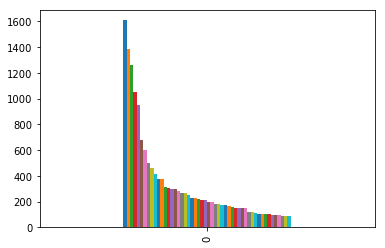

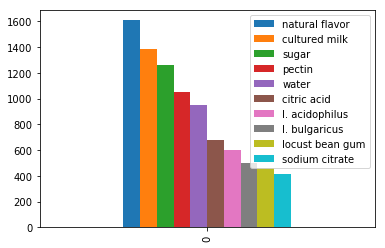

In [153]:
from collections import defaultdict
import matplotlib.pyplot as plt
import re

%matplotlib inline


ingredient_count = defaultdict(int)

for index, row in yogurts.iterrows():
    for ingredient in row['ingredients_text'].split(', '):
        ingredient_count[ingredient] += 1

df_count = pd.DataFrame.from_records([ingredient_count])
nk to 2nd plot. You are high

df_count['cultured milk'] = 0

for column in df_count:
    if re.match(r'Cultured.*milk|milk.*Cultured', column):
        df_count['cultured milk'] += df_count[column][0]
    if re.match(r'natural.*flavors', column):
        df_count['natural flavor'] += df_count[column][0]
        df_count[column][0] = 0
df_count = df_count.sort_values(by = [0], axis=1, ascending = False)
sorted(ingredient_count.items(), key=lambda x: x[1], reverse = True)

#Top 10 ingredients by frequency
print('There are approximately {0} branded yogurts for sale in the american market'.format(yogurts.shape[0]))
print('There are approximately {0} unique ingredients in these yogurts'.format(df_count.shape[1]))
df_count.iloc[:,range(50)].plot(kind='bar', legend = None)
print('Their top 10 ingredients, by frequency are')
df_count_top_10 = df_count.iloc[:,range(10)]
df_count_top_10.plot(kind='bar')